In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import callbacks
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, GRU
from keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 3000)
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}

max_words = 300
max_features = 3000
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)



model = Sequential()
model.add(Embedding(3000 , 32 , input_length = max_words))
model.add(layers.Bidirectional(LSTM(100, return_sequences=True)))
model.add(layers.Bidirectional(LSTM(100)))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')


1654784/1641221 [==============================] - 0s 0us/step


In [4]:
def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr*tf.math.exp(-0.5))

E = callbacks.EarlyStopping(patience = 27, monitor = 'val_loss')
L = callbacks.LearningRateScheduler(scheduler)

checkpoint_filepath = '/tmp/checkpoint'
M = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [5]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])


X_valid, y_valid = X_train[:64], y_train[:64]
X_train2, y_train2 = X_train[64:], y_train[64:]
history = model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=64, epochs=3, validation_split = 0.1 , callbacks = [E, L, M])

Epoch 1/3
351/351 [==============================] - 633s 2s/step - loss: 0.4850 - accuracy: 0.7625 - val_loss: 0.4601 - val_accuracy: 0.7723 - lr: 0.0010
Epoch 2/3
351/351 [==============================] - 614s 2s/step - loss: 0.3392 - accuracy: 0.8595 - val_loss: 0.3538 - val_accuracy: 0.8504 - lr: 0.0010
Epoch 3/3
351/351 [==============================] - 606s 2s/step - loss: 0.2872 - accuracy: 0.8835 - val_loss: 0.3053 - val_accuracy: 0.8713 - lr: 0.0010


In [6]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 176s 225ms/step - loss: 0.3038 - accuracy: 0.8723


[0.3038363754749298, 0.8722800016403198]

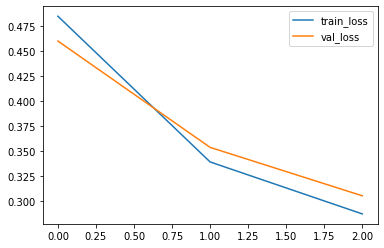

In [7]:
train_loss = history.history['loss']

val_loss = history.history['val_loss']

plt.figure
plt.plot(train_loss , label = 'train_loss')
plt.plot(val_loss , label = 'val_loss')
plt.legend()